<div style="text-align: right"> Notebook by: Jules Morris</div>
<div style="text-align: right"> August 2022</div>

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#linear algebra
import numpy as np
import pandas as pd

import time

import geopandas as gpd
import json

import regex as re

#helper modules
import acquire
#import prepare
import visuals
# import prepare_final
import model
import j_prep


#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import norm, skew 

# #deep learning
# import tensorflow as tf
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.losses import MeanSquaredLogarithmicError

#machine learning
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from plotapi import Chord

import folium
from folium.features import GeoJsonTooltip
import branca.colormap as cm

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.models import LinearInterpolator
from plotapi import Chord

#world bank data
#import wbgapi as wb

#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

#display max columns
pd.set_option('display.max_columns', None)


#pd.options.display.float_format = '{:20.2f}'.format 

sns.set_style("white")

<h1 style = "border:10px; border-style:groove; border-color: midnightblue; padding: 1em; text-align: center;" >  Let's get Messi! <br> <img src = "ronaldo-messi.gif" width = "700" align = "center"> </h1>

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Project Planning</h1>

- Acquire the FIFA data from the Kaggle.com website, save the data as csv's and store the process as a function for replication. Save the function in an Acquire.py file to import into the Final Report Notebook.

- View data to gain understanding of the dataset and to create the readme and data dictionary.
    
- Create README.md with data dictionary, project and business goals, a slide show presentation, documentation of the initial hypotheses.
    
- Clean and prepare data for the first iteration through the data pipeline. Store this as a function to automate the process, store the function in the prepare.py module, and prepare data in Final Report Notebook by importing and using the function.

- Subset data into four datasets based on field positions, use the Forwards subset.

- Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
   
- Establish a baseline accuracy and document well.

- Train three different regression models on the field positions.
    
- Evaluate models on train and validate datasets.
    
- Choose the model that performs the best and evaluate that single model on the test datasets.    

- Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.

- Upload README.md, Data Dictionary, acquire.py, prepare.py, Draft Notebook, and Final Report Notebook.

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Executive Summary</h1>

**Purpose:** 

- The purpose of this project was to discover which features are most important to predict the footballers salaries and to determine how best to use those features in a predictive model to accurately predict footballers salaries. Furthermore, we want to see if these factors are enough to determine the best players for depending on budget and essentially answer the question, can we spot a Messi in the making?

**Problem:** 

- Creating a salary prediction model for footballers is challenging due to the nature of the game, frequency of players playing multiple positions, the popularity and marketability of certain teams, leagues, and players, budget constraints, performance bonuses, injuries, and the clandestine nature of player contracts. Some factors are not readily quantifiable or hinge on predicted future footballer performance, while other factors follow a nonlinear relationship that can make accurate salary prediction even more challenging. 

**Analysis:**

- During the exploratory data analysis process we used statistical testing, clustering, recursive feature elimination, and feature engineering to determine which features are most important in a salary prediction model. 

- Results were improved uniformly when outliers were removed in trial modeling, though the results were negligible. Additionally, this does make salary prediction of star players challenging and potentially reduces the ability of the model to be robust to new data. 

**Solutions:**

- We used trained three regression models, Linear, Lasso + Lars, and a Generalized Linear Model using a Tweedie Regressor to see which model had the best predictive capacity to measure on the out-of-sample data. The regression models performed similarly with one another across the overall datasets and maintained the best performance even once the data was subset by field positions, resulting in the lowest overall Root Mean Squared Error and highest $R^{2}$ score. The best performing model was the Generalized Linear Model using a Tweedie Regressor, and the baseline was calculated by taking the average of the Root Mean Squared Error from the train and validation sets. This notebook focuses on the forwards subset, the overall in-depth analysis of the inclusive dataset is linked below.
<br/> <br/>
    - **<a href= "https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/Final.ipynb">Overall:</a>**
    
        - RMSE Baseline: €20154.67
        
        - The features that were included in the overall model were:
        
            - International Reputation
            - Overall
            - Reactions
            - Potential
            
        - Test RMSE: €11095.90, which marked a 44.95% improvement from the original RMSE of this dataset.
<br/> <br/>    
    - **Forwards:** 
    
        - RMSE Baseline: €21889.30
        
        - The features included in this model:
        
            - Overall
            - Shooting
            - Ball control
            
        - Test RMSE: €12579.66, which marked a 42.53% improvement from the original RMSE of this dataset.
        - In this subset, predictive capacity did not show the same improvement as the inclusive overall model, it was beneficial for forwards to remain in the original dataset. 
<br/><br/>    
 
**Conclusion:**

- The exploration process revealed several nonlinear relationships, including a players overall score, their age, and their potential. Due to the lack of linearity, the regression model was less precise in predictions than was hoped for. Additionally, player salaries was not normally distributed, making predictions more challenging for regression models. Removing outliers is a strategy to reduce RMSE, though there is a trade-off, due to reducing the robustness of the model to new data. 

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Acquire</h1>

In [2]:
#acquire
df = acquire.get_fifa_data()

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Prepare</h1>

In [ ]:
df = prepare.prepped_data(df)
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

# J Prep

In [3]:
#df = acquire.get_fifa_data()
df = j_prep.prepped_data(df)
goalkeeper_df, forward_df, midfielder_df, defender_df = j_prep.acquire_players_by_position(df)
#train, test, split
train, validate, test = j_prep.split(forward_df)

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Explore</h1>

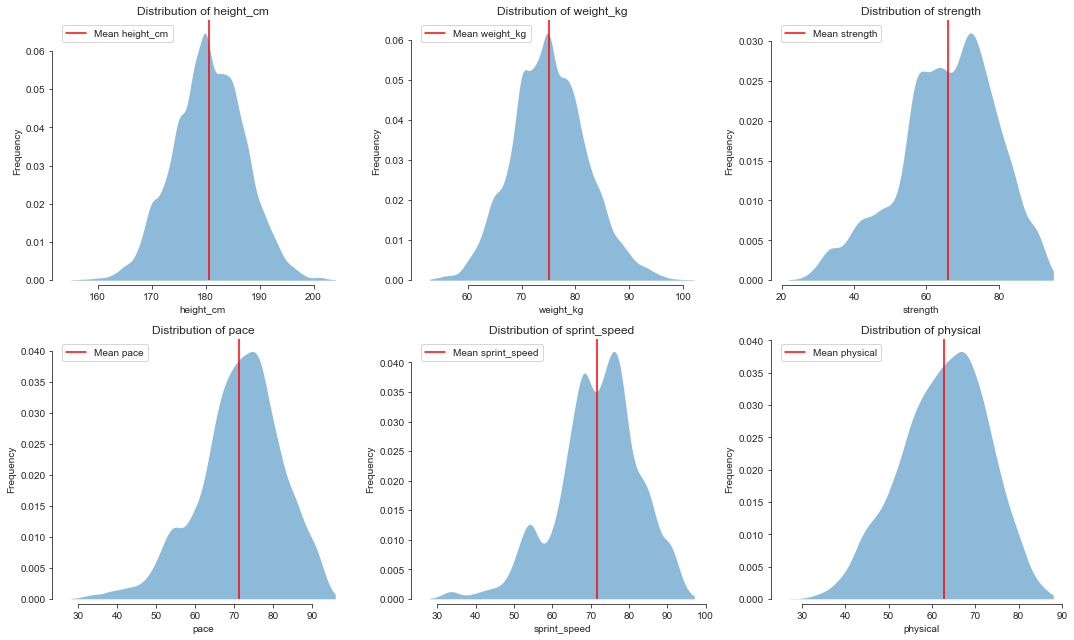

In [4]:
visuals.distributions()

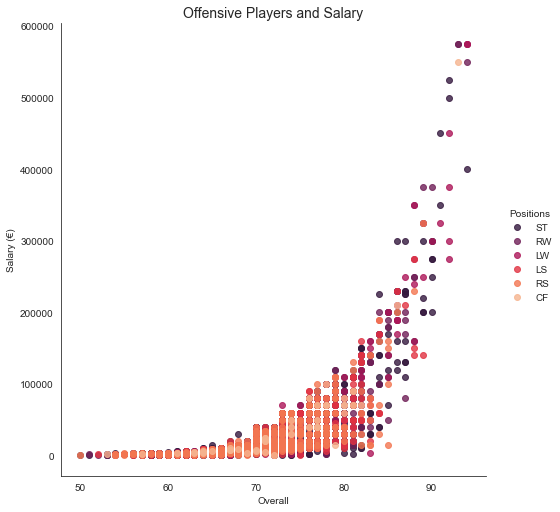

In [5]:
g = sns.lmplot(x = 'overall', 
           y = 'wage_eur', 
           hue = 'club_position', 
           palette =  'rocket',
           data = train.loc[train['club_position'].isin(['ST', 'RW', 'LW', 'RS', 'LS', 'CF'])], 
           fit_reg = False, size = 7,
           facet_kws = {'legend_out': True})

plt.xlabel('Overall')
plt.ylabel('Salary (€)')
g._legend.set_title('Positions')

plt.title('Offensive Players and Salary', fontsize = 14)
plt.show()

#### Takeaways:

- For offensive players, overall and wage shows an exponential growth relationship.

## What teams have the highest paid forwards in the world?

In [ ]:
#Real Madrid CF, FC Barcelona, 'Manchester City', 'Manchester United', 'Chelsea', 'Juventus', 'Liverpool',
#'FC Bayern München', 'Arsenal', 'Paris Saint-Germain' (biggest budgets)
train.groupby('club_name')['club_name_yr_sum'].nlargest().sort_values(ascending = False).head(60)

## What body type do forwards most frequently have?

---

You've Entered Position:  Position_ST
You've Entered Value €:  300000
['L. Toni' 'R. Rubin' 'A. Schoenfeld' 'Pedro Ribeiro' 'R. Belal']


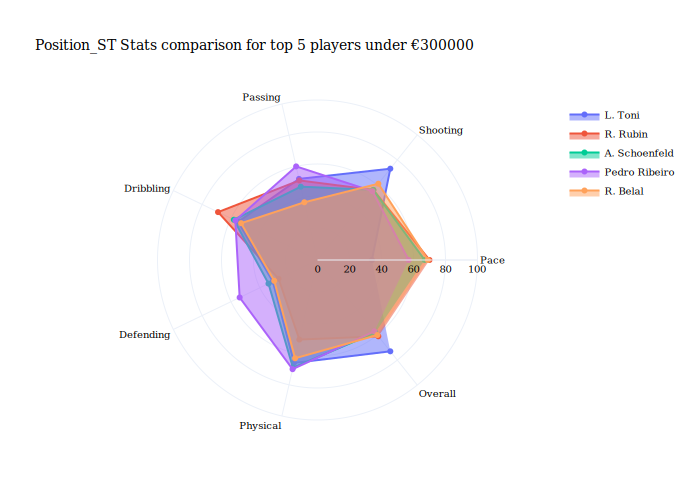

In [6]:
visuals.position('st', 300000)

---

You've Entered Position:  Position_CF
You've Entered Value €:  500000
['N. Burns' 'G. Docherty' 'Carlinhos' 'K. Aabech' 'F. El Bakhtaoui']


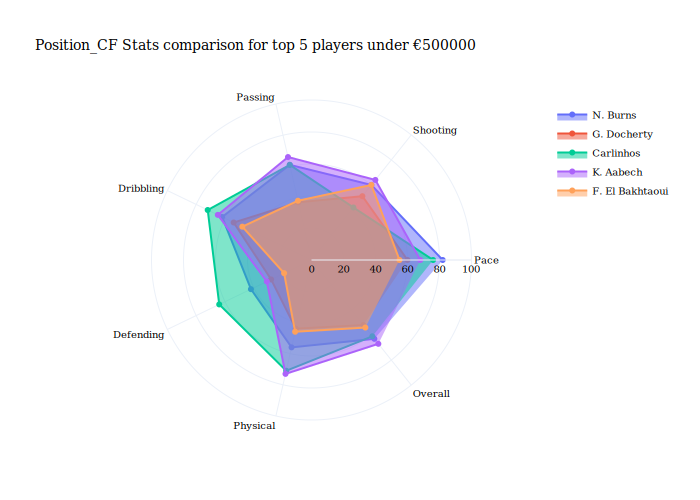

In [7]:
visuals.position('cf', 500000)

#### Takeaways
- Talented center forwards get paid well, there were no players making under €500k that were available for comparison. 

---

You've Entered Position:  Position_LW
You've Entered Value €:  300000
['D. Mbala' 'R. McKenzie' 'M. Riquelme' 'M. Helle' 'P. Åsbrink']


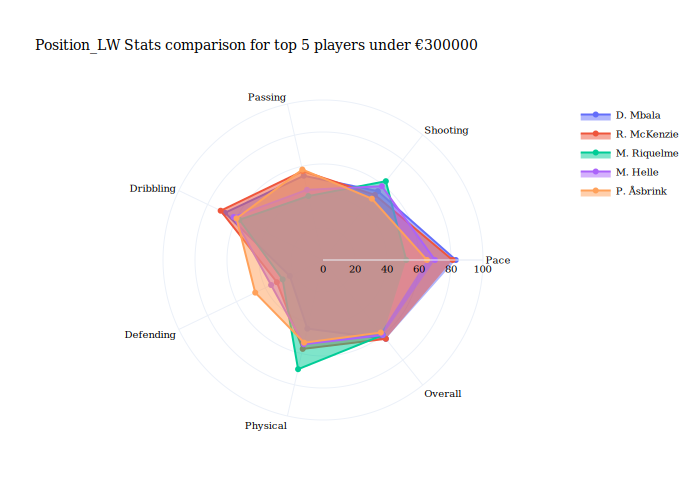

In [8]:
visuals.position('LW', 300000)

---

You've Entered Position:  Position_RW
You've Entered Value €:  300000
['J. Magennis' 'J. Griffiths' 'D. Petratos' 'O. Langås' 'B. Anklev']


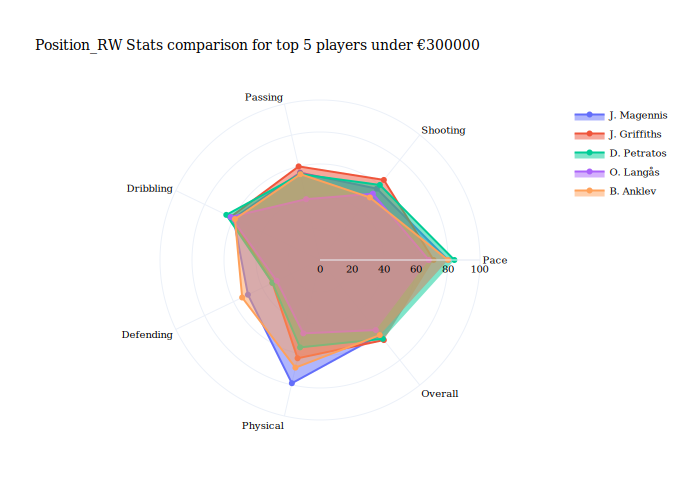

In [9]:
visuals.position('RW', 300000)

#### Takeaways:
- Pace is an important feature for Right Wing players, with slight differences, though areas like defending and physical have greater variation among this batch of players.

---

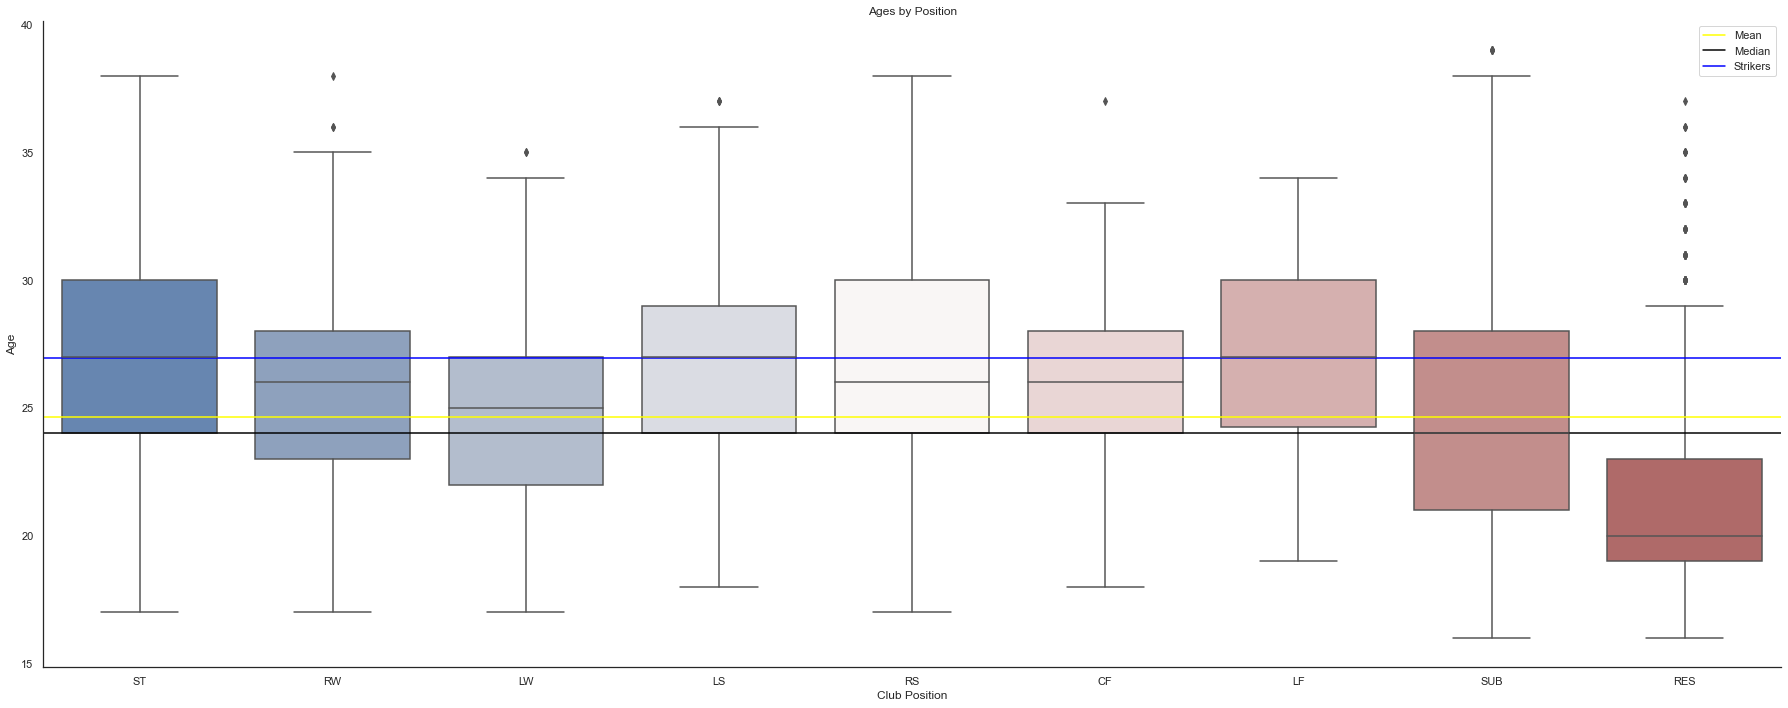

In [10]:
visuals.viz1()

#### Takeaways:

---

## Does age impact player salaries?
### Kendall's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation with between age and salary.

𝐻𝑎: There is a correlation between age and salary.

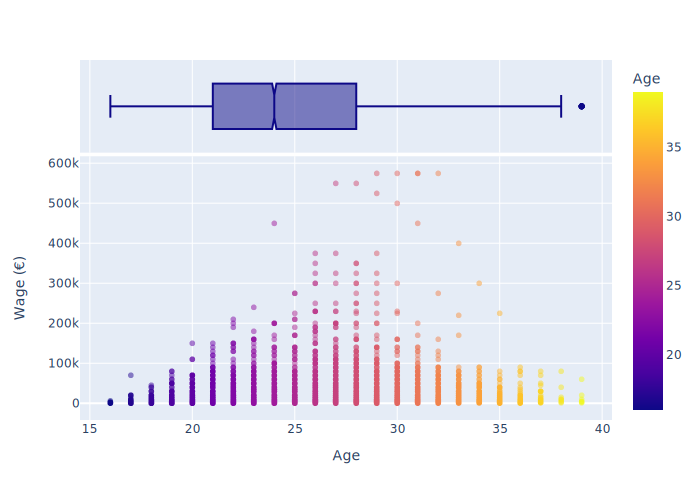

In [11]:
visuals.viz2()

#### Takeaways:
- Salary increase has a steady rise from the beginning of a players career and peaks between ages 26 through 29, with outstanding players most often in their salary prime during the ages of 27 and 32. 

In [12]:
#set alpha
α = 0.05

#perform test
coef, p = kendalltau(train.age, train.wage_eur)

#evaluate coefficient and p-value
print(f'τ: {coef:.3f}\nP-Value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

τ: 0.289
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- Statistically, there is some correlation between age and a footballers wages. 

---

## Does seniority (length of time playing with a club) impact salary?
### Kendall's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation with between seniority and salary.

𝐻𝑎: There is a correlation between seniority and salary.

In [13]:
#set alpha
α = 0.05

#perform test
coef, p = kendalltau(train.seniority, train.wage_eur)

#evaluate coefficient and p-value
print(f'τ: {coef:.3f}\nP-Value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

τ: 0.087
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- Statistically, there is some positive correlation with team seniority and player salary.

---

## Does the league a player is with impact salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [14]:
#setup crosstab
observed = pd.crosstab(train.league_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P-Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P-Value: 0.000
Reject the null hypothesis.


#### Are the wages of the English Premier League significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: EPL mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: EPL mean wages are > than the combined mean wages of all the leagues.

In [15]:
#set alpha
α = 0.05

#get sample
epl_sample = train[train.league_name == 'English Premier League'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(epl_sample, overall_mean)

#print p-value
print(f'P-Value: {p/2:.3f}')

#evaluate if mean of EPL wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P-Value: 0.000
Reject the null hypothesis.


---

####  Does the club a player is with impact salary?

### Are the wages of FC Barcelona significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the leagues.

In [16]:
#set alpha
α = 0.05

#get sample
bar_sample = train[train.club_name == 'FC Barcelona'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(bar_sample, overall_mean)

#print p-value
print(f'P-Value: {p/2:.3f}')

#evaluate if mean of Barcelona wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P-Value: 0.000
Reject the null hypothesis.


---

In [ ]:
#Start at BOTH NOT NORMALLY DISTRIBUTED USE KENDALLS on OG

<h1 style="border-bottom: 10px groove darkslategray; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Conclusion</h1>

- Splitting the data frame by field positions was beneficial for certain field positions, but was not beneficial for forwards compared to the inclusive dataset, which did not achieve the same level of improvement as the overall model when compared to their RMSE baseline. Having nonlinear, but highly correlated features to salaries such as a players overall and potential made fitting a regression model challenging. For future iterations of this project, we would like to explore building different predictive models that are better suited to representing the highly correlated features well.

- With more time we would like to separate this further by clubs/leagues, create datasets based on individual player positions rather than field positions, and retain outliers to build a model robust to star players.